<a href="https://colab.research.google.com/github/nacho-pancho/darset/blob/master/demo_RSET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#
# dependencias
#
!cd /content
!rm -rf darset
!git clone http://@github.com/nacho-pancho/darset.git

import os
import subprocess

os.chdir('/content/darset/data')
os.system('./get_data.sh')
os.chdir('/content/darset/code')

Cloning into 'darset'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 448 (delta 56), reused 50 (delta 21), pack-reused 352
Receiving objects: 100% (448/448), 2.52 MiB | 14.91 MiB/s, done.
Resolving deltas: 100% (301/301), done.


Leyendo archivo SMEC  para la central 5
Leyendo archivo scada de central 5: ../data//c5/c5_series10min.sas
9	NSeries								

H	meteo_utm_zona								

H	meteo_utm_zona								

dt: min0:09:59.616000 med=0:09:59.616002 max=0:10:00.480000
Leyendo archivo gen de central 5: ../data//c5/c5_series10minGen.sas
9	NSeries								

H	meteo_utm_zona								

H	meteo_utm_zona								

dt: min0:09:37.670400 med=0:09:59.961600 max=0:10:00.480000
Leyendo archivo de pronósticos para la central 5
tini=2015-10-01 00:00:00 tfin=2019-05-31 23:50:00 period=1338 days, 23:50:00
t_per_pixel=16:04:04.500000
velSCADA
velPRONOS
velGEN
dirSCADA
dirPRONOS
potSMEC10m
redraw
window: (datetime.datetime(2015, 10, 1, 0, 0), datetime.datetime(2015, 10, 8, 0, 0))
2015-10-01 00:00:00 2015-10-07 23:50:00


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:30:00 2015-10-07 23:50:00
{'dir': ['dirSCADA', 'dirPRONOS'], 'vel': ['velSCADA', 'velPRONOS', 'velGEN'], 'pot': ['potSMEC10m']}
0 10


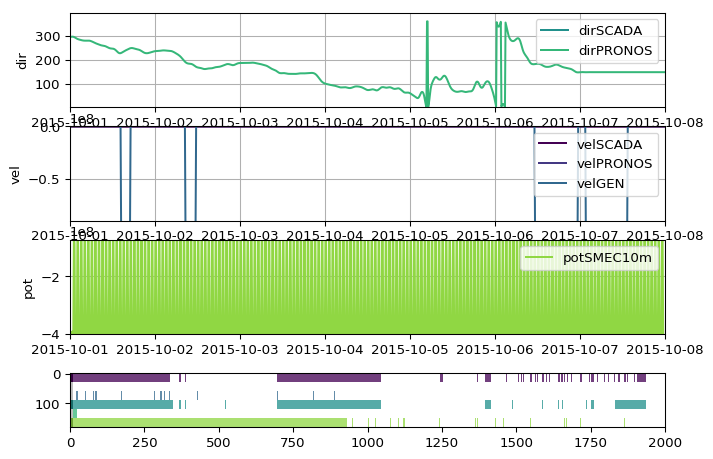

In [13]:
#!cd ../code
#
# cargamos modulos
#
import archivos
import filtros
import graficas

import matplotlib.pyplot as plt

nidCentral = 5
med_10min, med_15min = archivos.leerArchiSMEC(nidCentral)
parque = archivos.leerArchi(nidCentral,'scada')
parque2 = archivos.leerArchi(nidCentral,'gen') 
medidor_pronos10min = archivos.leerArchiPRONOS(nidCentral,10)
#medidor_pronos60min = archivos.leerArchiPRONOS(nidCentral,60)

parque.pot_SMEC  = med_10min

vel_SCADA = parque.medidores[0].get_medida('vel')
dir_SCADA = parque.medidores[0].get_medida('dir')
vel_GEN = parque2.medidores[0].get_medida('vel')

vel_pronos10min = medidor_pronos10min.get_medida('vel')
dir_pronos10min = medidor_pronos10min.get_medida('dir')

#    vel_pronos60min = medidor_pronos60min.get_medida('vel')
#    dir_pronos60min = medidor_pronos60min.get_medida('dir')

meds = []

#filtro_total = dir_SCADA.filtrada()

corr_dir_dir = filtros.corr_medidas(dir_SCADA,dir_pronos10min,12,1)
#meds.append(corr_dir_dir)

#decorr = parque.decorrelacion()
#for v in decorr.values():
#    meds.append(v)

#meds.append(parque.pot)

#meds.append(parque.cgm)

meds.append(vel_SCADA)
meds.append(vel_pronos10min)
meds.append(vel_GEN)

meds.append(dir_SCADA)
meds.append(dir_pronos10min)
#meds.append(dir_pronos60min)    

meds.append(med_10min)
#meds.append(med_15min)

plt.close('all')
graficas.clickplot(meds)
plt.show()

